<a href="https://colab.research.google.com/github/camerontruong/ARA-READABILITY/blob/main/Compensation_Pandas_V1_09AUG21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('comp.csv')

In [4]:
df.head()

,EXEC_FULLNAME,CFOANN,EXECDIR,OLD_DATAFMT_FLAG,INTERLOCK,REPRICE,EXECRANK,CO_PER_ROL,CONAME,TITLEANN,CEOANN,SALARY,BONUS,STOCK_AWARDS,OPTION_AWARDS,NONEQ_INCENT,PENSION_CHG,OTHCOMP,TOTAL_SEC,TOTAL_CURR,TOTAL_ALT1,TOTAL_ALT2,TERM_PYMT,CHG_CTRL_PYMT,SHROWN_TOT,SHROWN_TOT_PCT,SHROWN_EXCL_OPTS,SHROWN_EXCL_OPTS_PCT,OPT_EXER_NUM,OPT_EXER_VAL,SHRS_VEST_NUM,SHRS_VEST_VAL,AGE,OPTION_AWARDS_NUM,OPTION_AWARDS_FV,STOCK_AWARDS_FV,OPT_UNEX_EXER_NUM,OPT_UNEX_UNEXER_NUM,OPT_UNEX_EXER_EST_VAL,OPT_UNEX_UNEXER_EST_VAL,...,TDC1_PCT,TDC2_PCT,RET_YRS,COMMENT,GVKEY,EXECID,YEAR,RSTKVYRS,BECAMECEO,JOINED_CO,REJOIN,LEFTOFC,LEFTCO,RELEFT,PCEO,PCFO,TITLE,REASON,EXEC_LNAME,EXEC_FNAME,EXEC_MNAME,GENDER,NAMEPREFIX,PAGE,CUSIP,EXCHANGE,ADDRESS,CITY,STATE,ZIP,TELE,SICDESC,NAICSDESC,INDDESC,SPCODE,TICKER,SUB_TELE,NAICS,SPINDEX,SIC
0,David P. Storch,NaN,1,0,0,0,NaN,5623,AAR CORP,"Executive Chairman, Chief Executive Officer an...",CEO,850.00,0.0,1695.759,668.254,1400.900,72.831,622.830,5310.574,850.00,5310.574,3831.618,17848.896,29486.357,1489.499,3.681,1175.638,2.906,0.0,0.000,52.001,885.057,58.0,84.163,668.254,1695.759,335.809,217.497,2724.351,2272.907,...,-18.613,-7.792,NaN,NaN,1004.0,9249.0,2010.0,NaN,19961009.0,NaN,NaN,20180531.0,NaN,NaN,NaN,NaN,Chairman & CEO,NaN,Storch,David,P.,MALE,Mr.,68.0,00036110,NYS,"One AAR Place, 1100 North Wood Dale Road",Wood Dale,IL,60191,630 227 2000,"MACHINERY, EQUIPMENT, AND SUPPLIES-WHOLESALE",Transportation Equipment and Supplies (except ...,Aerospace & Defense,SM,AIR,630.0,423860.0,2010.0,5080.0
1,Timothy J. Romenesko,NaN,1,0,0,0,NaN,5626,AAR CORP,"President, Chief Operating Officer and Director",NaN,468.18,0.0,819.306,322.872,701.469,32.962,242.640,2587.429,468.18,2587.429,1649.491,6341.990,15069.292,346.829,0.861,264.500,0.657,0.0,0.000,12.000,204.240,54.0,40.664,322.872,819.306,44.783,107.331,403.205,1123.526,...,-16.387,-23.814,NaN,NaN,1004.0,9252.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vice Chairman,NaN,Romenesko,Timothy,J.,MALE,Mr.,64.0,00036110,NYS,"One AAR Place, 1100 North Wood Dale Road",Wood Dale,IL,60191,630 227 2000,"MACHINERY, EQUIPMENT, AND SUPPLIES-WHOLESALE",Transportation Equipment and Supplies (except ...,Aerospace & Defense,SM,AIR,630.0,423860.0,2010.0,5080.0
2,Richard J. Poulton,CFO,0,0,0,0,NaN,35684,AAR CORP,"Chief Financial Officer, Vice President and Tr...",NaN,367.20,0.0,488.378,192.458,440.137,0.000,89.931,1578.104,367.20,1578.104,1025.552,3677.421,5005.658,139.521,0.346,105.442,0.262,10.0,128.284,0.000,0.000,46.0,24.239,192.458,488.378,16.000,68.239,155.560,701.100,...,-10.871,14.122,NaN,NaN,1004.0,33979.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chief Financial Officer, Vice President and Tr...",NaN,Poulton,Richard,J.,MALE,Mr.,55.0,00036110,NYS,"One AAR Place, 1100 North Wood Dale Road",Wood Dale,IL,60191,630 227 2000,"MACHINERY, EQUIPMENT, AND SUPPLIES-WHOLESALE",Transportation Equipment and Supplies (except ...,Aerospace & Defense,SM,AIR,630.0,423860.0,2010.0,5080.0
3,Terry D. Stinson,NaN,0,0,0,0,NaN,38212,AAR CORP,Group Vice President of Structures & Systems S...,NaN,338.13,0.0,86.350,158.800,470.653,0.000,260.146,1314.079,338.13,1314.079,1203.139,0.000,0.000,68.570,0.170,55.238,0.137,0.0,0.000,7.298,134.210,69.0,20.000,158.800,86.350,3.333,26.667,37.630,257.670,...,-19.949,-26.301,NaN,NaN,1004.0,36199.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Group Vice President of Structures & Systems S...,NaN,Stinson,Terry,D.,MALE,Mr.,79.0,00036110,NYS,"One AAR Place, 1100 North Wood Dale Road",Wood Dale,IL,60191,630 227 2000,"MACHINERY, EQUIPMENT, AND SUPPLIES-WHOLESALE",Transportation Equipment and Supplies (except ...,Aerospace & Defense,SM,AIR,630.0,423860.0,2010.0,5080.0
4,Robert J. Regan,NaN,0,0,0,0,5.0,44350,AAR CORP,"General Counsel, Vice President and Secretary",NaN,367.20,0.0,488.378,192.458,440.137,0.000,108.729,1596.902,367.20,1596.902,925.454,2470.921,3799.158,102.415,0.254,81.004,0.201,0.0,0.000,0.344,9.388,53.0,24.239,192.458,488.378,6.666,37.573,75.259,371.601,...,NaN,NaN,NaN,NaN

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15055 entries, 0 to 15054
Columns: 107 entries, EXEC_FULLNAME to SIC
dtypes: float64(76), int64(5), object(26)
memory usage: 12.3+ MB


GETTING VARIABLES OF INTEREST

In [30]:
data = df[["EXEC_FULLNAME", "CONAME", "CEOANN","SALARY","BONUS","STOCK_AWARDS", "OPTION_AWARDS","YEAR", "AGE","STATE"]]


GETTING ONLY IF CEO

In [31]:
CEO = data[data['CEOANN'].notna()]
CEO

,EXEC_FULLNAME,CONAME,CEOANN,SALARY,BONUS,STOCK_AWARDS,OPTION_AWARDS,YEAR,AGE,STATE
0,David P. Storch,AAR CORP,CEO,850.000,0.0,1695.759,668.254,2010.0,58.0,IL
5,David P. Storch,AAR CORP,CEO,867.000,0.0,2664.745,578.460,2011.0,59.0,IL
10,David P. Storch,AAR CORP,CEO,877.838,0.0,619.200,695.520,2012.0,60.0,IL
16,David P. Storch,AAR CORP,CEO,906.449,0.0,1342.704,1622.016,2013.0,61.0,IL
22,David P. Storch,AAR CORP,CEO,906.449,0.0,1695.200,0.000,2014.0,62.0,IL
...,...,...,...,...,...,...,...,...,...,...
15035,David B. Driscoll,GETTY REALTY CORP,CEO,545.192,415.0,180.400,0.000,2015.0,60.0,NY
15039,Christopher J. Constant,GETTY REALTY CORP,CEO,467.308,225.0,275.400,0.000,2016.0,37.0,NY
15043,Christopher J. Constant,GETTY REALTY CORP,CEO,484.615,300.0,395.400,0.000,2017.0,38.0,NY
15047,Christopher J. Constant,GETTY REALTY CORP,CEO,493.654,340.0,435.225,0.000,2018.0,39.0,NY


GETTING ONLY IF SALARY is not missing

In [29]:
CEO = CEO[CEO['SALARY'].notna()]
CEO

,EXEC_FULLNAME,CONAME,CEOANN,SALARY,BONUS,STOCK_AWARDS,OPTION_AWARDS,AGE,STATE
0,David P. Storch,AAR CORP,CEO,850.000,0.0,1695.759,668.254,58.0,IL
5,David P. Storch,AAR CORP,CEO,867.000,0.0,2664.745,578.460,59.0,IL
10,David P. Storch,AAR CORP,CEO,877.838,0.0,619.200,695.520,60.0,IL
16,David P. Storch,AAR CORP,CEO,906.449,0.0,1342.704,1622.016,61.0,IL
22,David P. Storch,AAR CORP,CEO,906.449,0.0,1695.200,0.000,62.0,IL
...,...,...,...,...,...,...,...,...,...
15035,David B. Driscoll,GETTY REALTY CORP,CEO,545.192,415.0,180.400,0.000,60.0,NY
15039,Christopher J. Constant,GETTY REALTY CORP,CEO,467.308,225.0,275.400,0.000,37.0,NY
15043,Christopher J. Constant,GETTY REALTY CORP,CEO,484.615,300.0,395.400,0.000,38.0,NY
15047,Christopher J. Constant,GETTY REALTY CORP,CEO,493.654,340.0,435.225,0.000,39.0,NY


In [23]:
# CHECKING data information
CEO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2743 entries, 0 to 15051
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EXEC_FULLNAME  2743 non-null   object 
 1   CONAME         2743 non-null   object 
 2   CEOANN         2743 non-null   object 
 3   SALARY         2743 non-null   float64
 4   BONUS          2743 non-null   float64
 5   STOCK_AWARDS   2743 non-null   float64
 6   OPTION_AWARDS  2743 non-null   float64
 7   STATE          2686 non-null   object 
dtypes: float64(4), object(4)
memory usage: 192.9+ KB


GETTING SIMPLE STATS

In [24]:
CEO.mean()

SALARY            993.564643
BONUS             210.099016
STOCK_AWARDS     3620.960745
OPTION_AWARDS    1154.104736
dtype: float64

In [25]:
CEO[["SALARY","BONUS","STOCK_AWARDS","OPTION_AWARDS"]].describe()

,SALARY,BONUS,STOCK_AWARDS,OPTION_AWARDS
count,2743.000000,2743.000000,2743.000000,2743.000000
mean,993.564643,210.099016,3620.960745,1154.104736
std,453.116733,957.691916,4150.507809,2869.877839
min,0.000000,0.000000,-655.000000,-73.000000
25%,724.269500,0.000000,853.627000,0.000000
50%,961.057000,0.000000,2439.747000,137.340000
75%,1200.000000,0.000000,5099.963000,1574.122500
max,3800.000000,17502.000000,72054.874000,115884.000000


GET data if year=2020

In [40]:
LATEST = CEO[CEO['YEAR']==2020]
LATEST

,EXEC_FULLNAME,CONAME,CEOANN,SALARY,BONUS,STOCK_AWARDS,OPTION_AWARDS,YEAR,AGE,STATE
120,William Douglas Parker,AMERICAN AIRLINES GROUP INC,CEO,0.000,0.00,10624.000,0.000,2020.0,58.0,TX
234,Jeffrey B. Guldner,PINNACLE WEST CAPITAL CORP,CEO,1100.000,0.00,3316.740,0.000,2020.0,54.0,AZ
295,"John W. Robinson, III",PROG HOLDINGS INC,CEO,701.538,0.00,3930.067,1038.141,2020.0,48.0,UT
360,Robert B. Ford,ABBOTT LABORATORIES,CEO,1298.462,0.00,5623.995,5624.993,2020.0,46.0,IL
477,"Lisa T. Su, Ph.D.",ADVANCED MICRO DEVICES,CEO,1095.574,0.00,18840.582,4643.535,2020.0,50.0,CA
...,...,...,...,...,...,...,...,...,...,...
14740,Mary T. Barra,GENERAL MOTORS CO,CEO,1995.000,0.00,13093.722,3750.002,2020.0,58.0,MI
14747,Douglas L. Parks,GENERAL MOTORS CO,CEO,767.500,0.00,3543.682,1021.888,2020.0,58.0,MI
14807,"Eugene Joseph Lowe, III",SPX CORP,CEO,917.724,246.05,2863.057,930.291,2020.0,52.0,NC
14933,Steven R. Downing,GENTEX CORP,CEO,764.423,0.00,1843.293,0.000,2020.0,42.0,MI


In [41]:
LATEST[["SALARY","BONUS","STOCK_AWARDS","OPTION_AWARDS"]].describe()

,SALARY,BONUS,STOCK_AWARDS,OPTION_AWARDS
count,209.000000,209.000000,209.000000,209.000000
mean,1027.857818,194.890124,5205.249512,1135.502072
std,425.541497,755.650281,6438.132666,1912.957604
min,0.000000,0.000000,0.000000,0.000000
25%,800.000000,0.000000,1938.280000,0.000000
50%,1000.000000,0.000000,3543.682000,0.000000
75%,1250.000000,0.000000,6959.274000,1575.002000
max,3439.245000,5260.500000,72054.874000,11112.869000


GO BY GROUPS

In [61]:
 AGE_SAL = CEO.groupby('AGE', as_index=False)['SALARY'].mean()
 AGE_SAL

,AGE,SALARY
0,32.0,900.00
1,33.0,900.00
2,34.0,900.00
3,35.0,900.00
4,36.0,225.00
...,...,...
59,91.0,2500.00
60,92.0,2500.00
61,94.0,750.00
62,95.0,787.50


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

<BarContainer object of 64 artists>

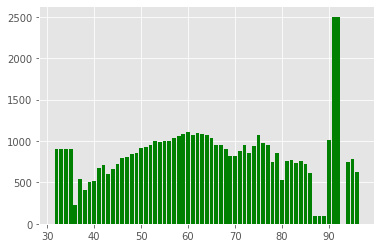

In [63]:
plt.bar(AGE_SAL.AGE, AGE_SAL.SALARY, color='green')

In [64]:
import plotly.express as px
fig = px.bar(AGE_SAL, x='AGE', y='SALARY')
fig.show()

In [65]:
corr = AGE_SAL.AGE.corr(AGE_SAL.SALARY)
print(corr)

0.15276127552812555


In [ ]:
 STAT_SAL = CEO.groupby('STATE', as_index=False)['SALARY'].mean()
 STAT_SAL

In [67]:
import plotly.express as px
fig = px.bar(STAT_SAL, x='STATE', y='SALARY')
fig.show()

Has salary gone up over years?

In [68]:
 STAT_YEAR = CEO.groupby('YEAR', as_index=False)['SALARY'].mean()
 STAT_YEAR

,YEAR,SALARY
0,2010.0,924.265545
1,2011.0,938.114858
2,2012.0,951.576474
3,2013.0,987.430441
4,2014.0,996.761407
5,2015.0,1006.265952
6,2016.0,1021.888926
7,2017.0,1014.141927
8,2018.0,1039.212420
9,2019.0,1064.515470


In [69]:
import plotly.express as px
fig = px.bar(STAT_YEAR, x='YEAR', y='SALARY')
fig.show()

In [71]:
corr = STAT_YEAR.YEAR.corr(STAT_YEAR.SALARY)
print(corr)

0.9392264237407322
